In [28]:
# 18.05.2024
# обновлена схема, построены графики для пилотного сигнала

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
%matplotlib widget

На картинке изображена структурная схема модели, которую планируется реализовать.

- Желтым цветом отмечены блоки, функции для которых на данный момент прописаны.

- Синим цветом отмечены блоки, над которыми либо ведется работа, либо они просто пропущены (тк не написан другой блок, без которого этот не может обойтись), но будут в финальной модели.

- Красным цветом отмечены блоки, которые делать не планируется.

![Структурная схема модели](../model_structure.png)

### Сравнение метрик для ZF и MMSE

In [29]:
metrics = pd.read_csv('comparison_metrics.txt', sep=',', index_col=False, header=0, skipinitialspace=True)

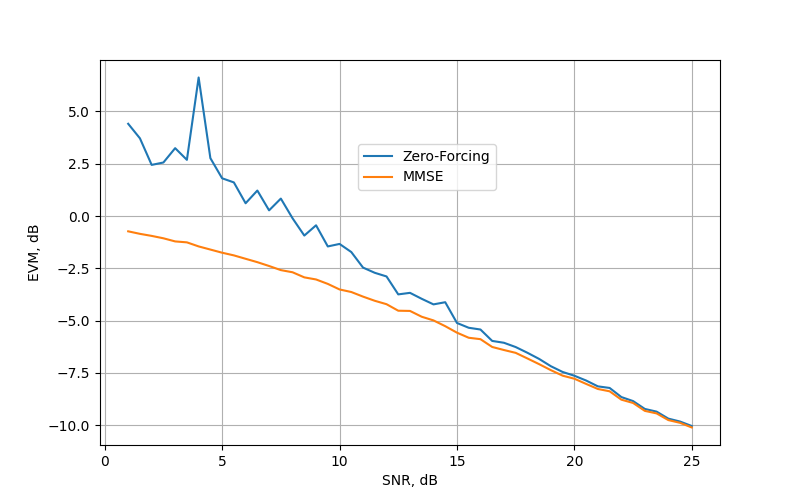

In [30]:
fig1 = plt.figure(figsize=(8,5))
ax_1 = fig1.add_subplot(111)
ax_1.plot(metrics['SNR_dB'], 10*np.log10(metrics['EVM_ZF']), label='Zero-Forcing')
ax_1.plot(metrics['SNR_dB'], 10*np.log10(metrics['EVM_MMSE']), label='MMSE')
ax_1.set_ylabel("EVM, dB")
ax_1.set_xlabel("SNR, dB")
ax_1.legend(bbox_to_anchor=(0.65, 0.8))
ax_1.grid()
#ax_1.set_title('Real part')
#fig1.suptitle('Information points on constellation diagram')
plt.show()

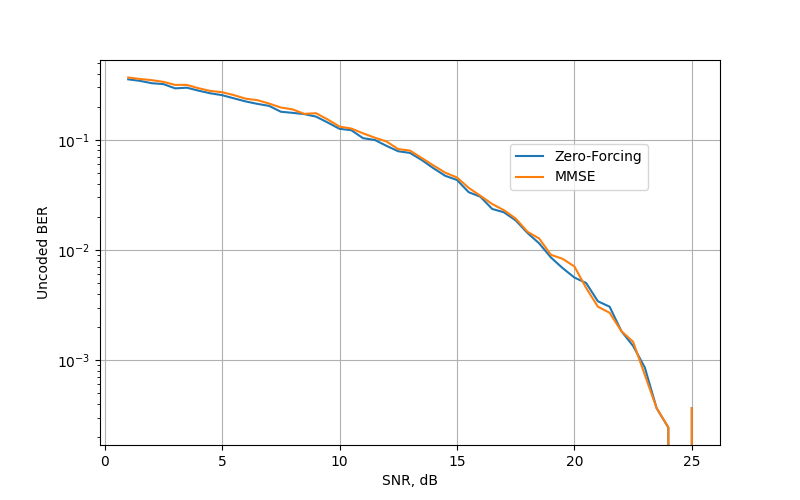

In [31]:
fig2 = plt.figure(figsize=(8,5))
ax_1 = fig2.add_subplot(111)
ax_1.plot(metrics['SNR_dB'], metrics['BER_ZF'], label='Zero-Forcing')
ax_1.plot(metrics['SNR_dB'], metrics['BER_MMSE'], label='MMSE')
ax_1.set_ylabel("Uncoded BER")
ax_1.set_xlabel("SNR, dB")
ax_1.set_yscale('log')
ax_1.legend(bbox_to_anchor=(0.65, 0.8))
ax_1.grid()
#ax_1.set_title('Real part')
#fig2.suptitle('Information points on constellation diagram')
plt.show()

### Спектр выходного сигнала

In [32]:
info_frame = pd.read_csv('info_frame.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'], skipinitialspace=True)
pilots_frame = pd.read_csv('pilots_frame.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'], skipinitialspace=True)

In [33]:
info_signal = (info_frame['Re'] + 1j*info_frame['Im']).to_numpy()
pilots_signal = (pilots_frame['Re'] + 1j*pilots_frame['Im']).to_numpy()

In [34]:
# values from IEEE 802.11a for 20 MHz band
Bw = 20*1e6      # Hz -- Bandwidth
Ts = 3.2*1e-6    # sec -- duration of the frame (3.2 us)
delta_f = 1/Ts   # Hz -- band between neighbouring subcarriers (312.5 kHz)
fr_len = 64      # the length of OFDM frame

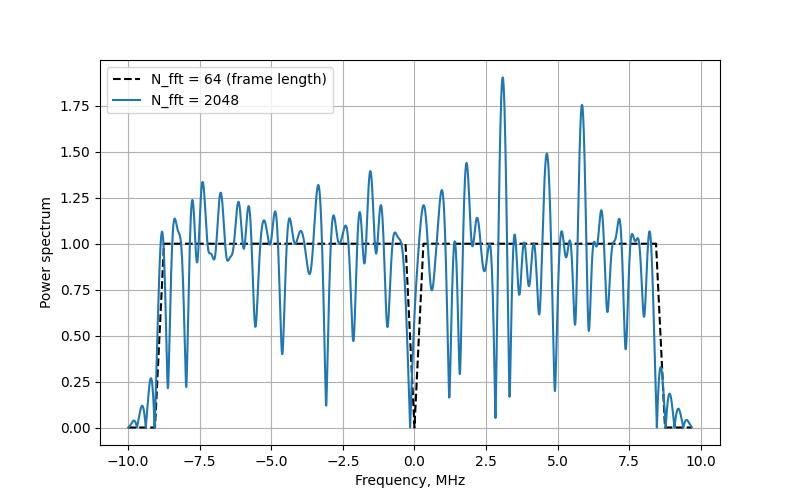

In [35]:
fig3 = plt.figure(figsize=(8,5))
ax_1 = fig3.add_subplot(111)
ax_1.plot(np.linspace(-Bw/2, Bw/2-delta_f, fr_len)*1e-6, np.fft.fftshift(abs(info_signal)), 'k--', label='N_fft = 64 (frame length)')
ax_1.plot(np.linspace(-Bw/2, Bw/2-delta_f, 2048)*1e-6, np.fft.fftshift(abs(np.fft.fft(np.fft.ifft(info_signal), 2048))), label='N_fft = 2048')
ax_1.set_ylabel("Power spectrum")
ax_1.set_xlabel("Frequency, MHz")
ax_1.legend()
ax_1.grid()
#ax_1.set_title(r'N_fft=frame_length ({:})'.format(fr_len))
plt.show()

C:\Users\ilya.voropaev\AppData\Local\Temp\ipykernel_15616\1812135263.py:3: RuntimeWarning: divide by zero encountered in log10
  ax_1.plot(np.linspace(-Bw/2, Bw/2-delta_f, fr_len)*1e-6, 20*np.log10(np.fft.fftshift(abs(info_signal))), 'k--', label='N_fft = 64 (frame length)')


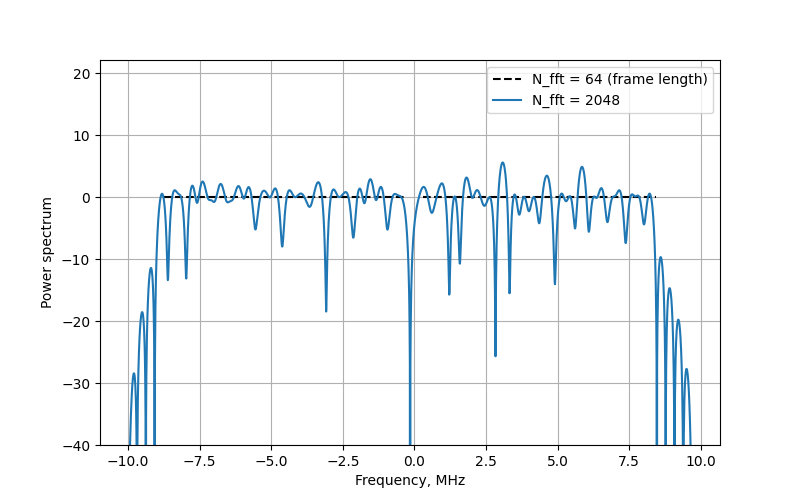

In [36]:
fig4 = plt.figure(figsize=(8,5))
ax_1 = fig4.add_subplot(111)
ax_1.plot(np.linspace(-Bw/2, Bw/2-delta_f, fr_len)*1e-6, 20*np.log10(np.fft.fftshift(abs(info_signal))), 'k--', label='N_fft = 64 (frame length)')
ax_1.plot(np.linspace(-Bw/2, Bw/2-delta_f, 2048)*1e-6, 20*np.log10(np.fft.fftshift(abs(np.fft.fft(np.fft.ifft(info_signal), 2048)))), label='N_fft = 2048')
ax_1.set_ylabel("Power spectrum")
ax_1.set_xlabel("Frequency, MHz")
ax_1.legend()
ax_1.grid()
ax_1.set_ylim(bottom=-40)
#ax_1.set_title(r'N_fft=frame_length ({:})'.format(fr_len))
plt.show()